In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Bidirectional, LSTM, SimpleRNN,GRU,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [2]:
# Load the dataset
# df = pd.read_excel('../../dataset/Dataset_IoV.xlsx')  
df = pd.read_csv('..//..//dataset//preliminary_dataset.csv')  


# Separating features and target
X = df[['Number of Lanes', 'Status of driver', 'Nature of environment', 'Velocity of vehicle', 'Distance between vehicles', 'Breaking capability']]
y = df['Collussion']
# scaler=RobustScaler()
# X_scaled = scaler.fit_transform(X)

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
X_scaled = X

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [3]:
print(X_train.shape, y_train.shape,X_scaled.shape)

(32000, 1, 6) (32000,) (40000, 1, 6)


# Model

In [5]:
def build_drnn_lstm():
    model = Sequential()
    
    # Input layer
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    
    # DRNN layer
    model.add(SimpleRNN(units=50, activation='relu', return_sequences=True))
    model.add(SimpleRNN(units=50, activation='relu', return_sequences=True))
    
    # LSTM layer
    model.add(LSTM(units=50, activation='relu', return_sequences=True))
    model.add(LSTM(units=50, activation='relu', return_sequences=True))
    model.add(LSTM(units=50, activation='relu', return_sequences=True))
    
    # Output layer
    model.add(Dense(units=1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['mse', 'mae'])
    
    return model


In [9]:
# Instantiate and train the model
model = build_drnn_lstm()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - loss: 0.1462 - mae: 0.1010 - mse: 0.0487 - val_loss: 0.0440 - val_mae: 0.0273 - val_mse: 0.0136
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0455 - mae: 0.0282 - mse: 0.0143 - val_loss: 0.0443 - val_mae: 0.0252 - val_mse: 0.0139
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0420 - mae: 0.0263 - mse: 0.0133 - val_loss: 0.0417 - val_mae: 0.0225 - val_mse: 0.0131
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0407 - mae: 0.0251 - mse: 0.0129 - val_loss: 0.0384 - val_mae: 0.0265 - val_mse: 0.0123
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0413 - mae: 0.0258 - mse: 0.0130 - val_loss: 0.0400 - val_mae: 0.0273 - val_mse: 0.0127
Epoch 6/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0385 - mae: 0.0246 - mse: 0.0124 - val_loss: 0.0377 - val_mae: 0.0263 - val_mse: 0.0123
Epoch 7/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0382 - mae: 0.0

In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np
# Make predictions
y_pred = model.predict(X_test)




250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


In [8]:
# Convert continuous output to binary (0 or 1) using a threshold

y_pred_binary = (y_pred > 0.5).astype(int)
y_pred_binary = y_pred_binary.flatten()

# Convert y_test to a NumPy array and flatten
y_test_flat = y_test.to_numpy().flatten()

y_pred_flat = y_pred.flatten()
mse = mean_squared_error(y_test_flat, y_pred_flat)
print(f'Mean Squared Error for y_pred_flat (MSE): {mse:.16f}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.16f}')


Mean Squared Error for y_pred_flat (MSE): 0.0129149630665779
Root Mean Squared Error (RMSE): 0.1136440190532608


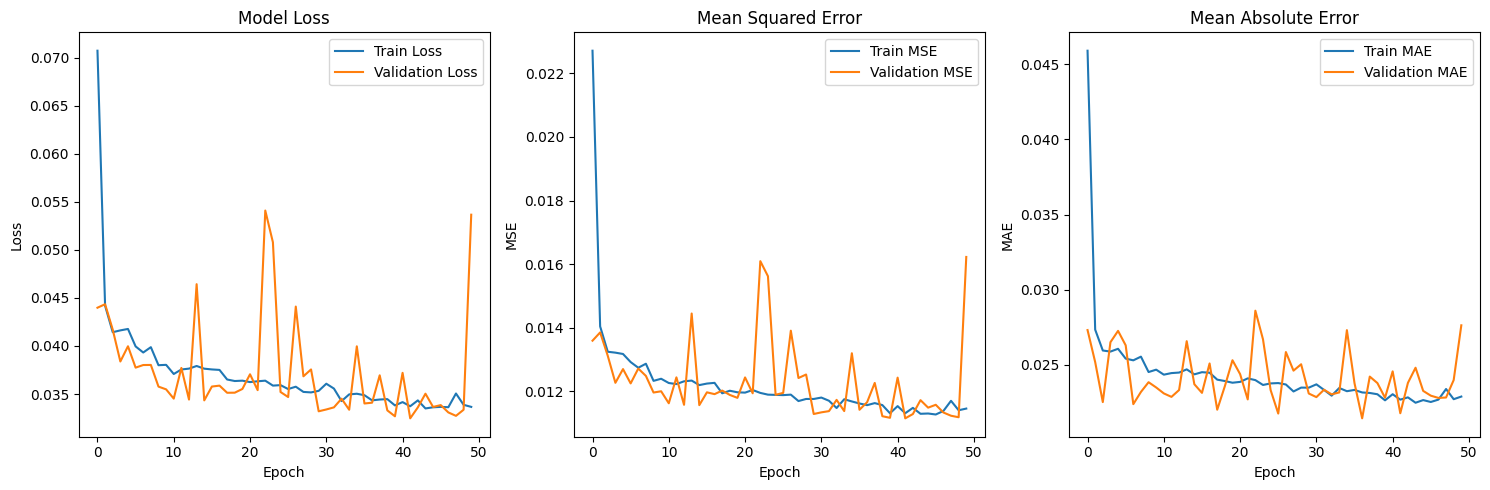

In [12]:
import matplotlib.pyplot as plt

# Visualizing the loss, MSE, and MAE
plt.figure(figsize=(15, 5))

# Loss plot
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# MSE plot
plt.subplot(1, 3, 2)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# MAE plot
plt.subplot(1, 3, 3)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [9]:
import time

# Start time
start_time = time.time()

# Make predictions
y_pred = model.predict(X_test)

# End time
end_time = time.time()

# Total AES time
total_time = end_time - start_time  

# AES per sample
aes_per_sample = (total_time / len(X_test)) * 1e6  # Convert to microseconds (µs)

print(f'Total AES Time: {total_time:.6f} seconds')
print(f'AES Time per Sample: {aes_per_sample:.2f} µs/sample')


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Total AES Time: 1.702161 seconds
AES Time per Sample: 212.77 µs/sample
